<a href="https://colab.research.google.com/github/lopeztanya033/Caso-Estudio-Terremotos-/blob/main/Trabajo_Cluster_terremoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###  Nombre:  Tanya Lopez Mestanza

Analizar los datos de csv Caso Terremoto.
Analizar los datos y establecer Clusters con el metodo K-means.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("Casoterremoto.csv")
X = data[["latitude", "longitude", "depth"]]
df =pd.DataFrame(X, columns=["latitude", "longitude", "depth"] )


### Diccionario de Datos - Conjunto de Datos de Terremotos
### https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

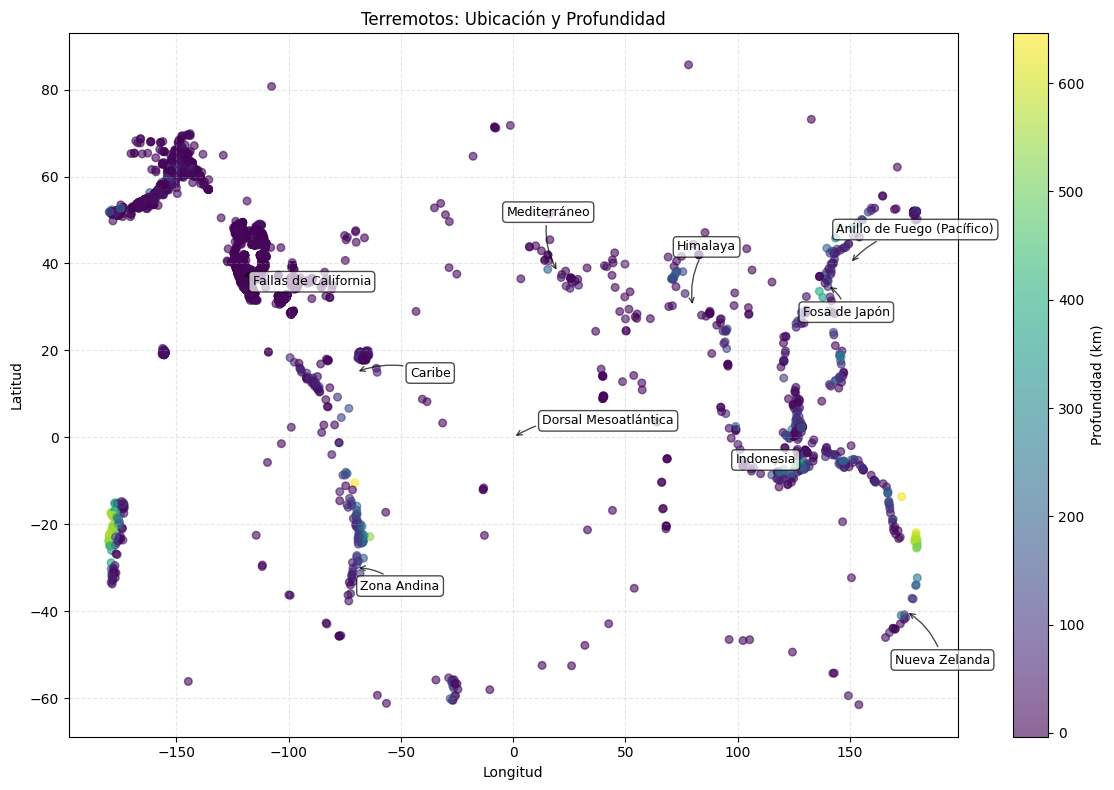

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X["longitude"], X["latitude"], c=X["depth"],
                     cmap="viridis", alpha=0.6, s=30)
plt.colorbar(label="Profundidad (km)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Terremotos: Ubicación y Profundidad")

# Añadir etiquetas de regiones tectónicas importantes
regiones = {
    "Anillo de Fuego (Pacífico)": (150, 40),
    "Fosa de Japón": (140, 35),
    "Zona Andina": (-70, -30),
    "Dorsal Mesoatlántica": (0, 0),
    "Himalaya": (80, 30),
    "Indonesia": (120, -5),
    "Fallas de California": (-120, 37),
    "Nueva Zelanda": (175, -40),
    "Caribe": (-70, 15),
    "Mediterráneo": (20, 38)
}

# Añadir las etiquetas con flechas
for region, coords in regiones.items():
    plt.annotate(
        region,
        xy=coords,
        xytext=(coords[0] + np.random.randint(-30, 30),
                coords[1] + np.random.randint(-15, 15)),
        fontsize=9,
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=0.2",
            color="black",
            alpha=0.7
        ),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )

# Añadir una cuadrícula para mejor referencia
plt.grid(linestyle='--', alpha=0.3)

# Mejorar los márgenes
plt.tight_layout()

plt.show()

In [ ]:
###  2. Preprocesamiento
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(df)

In [ ]:
X_normalizado

array([[-1.18281576,  0.68858055, -0.07305152],
       [-1.18274126,  0.68861813, -0.08169061],
       [-0.01718737, -0.21369183, -0.35814154],
       ...,
       [ 0.29599475, -0.05374722, -0.24210283],
       [ 1.4687006 , -0.62240239, -0.12351167],
       [ 0.1535867 , -0.0470228 , -0.35264393]])

In [ ]:
 ### Normaliza las características para que tengan m, clumns= edia 0 y desviación estándar 1
df_normalizado =pd.DataFrame(X_normalizado, columns = ['latitude', 'longitude', 'depth'])
df_normalizado

,latitude,longitude,depth
0,-1.182816,0.688581,-0.073052
1,-1.182741,0.688618,-0.081691
2,-0.017187,-0.213692,-0.358142
3,1.265269,-0.643800,0.367346
4,-0.019963,-0.212755,-0.369137
...,...,...,...
10154,0.483029,-0.076570,-0.350091
10155,1.236799,-0.687284,-0.324174
10156,0.295995,-0.053747,-0.242103
10157,1.468701,-0.622402,-0.123512


In [ ]:
###  Aplicación de DBSCAN
###  eps=0.3, eps=0.7 y min_samples=10.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.50, min_samples = 10 )
## ajustar el mdelo
labels = dbscan.fit_predict(df_normalizado[['latitude', 'longitude', 'depth']])
df['cluster']= labels
cluster_counts = df['cluster'].value_counts()

In [ ]:
cluster_counts

,count
cluster,
1,8808
0,408
3,402
-1,247
2,125
4,39
5,37
6,33
7,30


In [ ]:
####    Con eps=> 0,3  cluster_counts--> 17 cluster
####    Con eps=> 0,5  cluster_counts--> 12 cluster
###     con eps=> 0,7   cluster count--> 8 clusters
###     con eps = 0,8  cluster count-->  6 cluster...
###  los mas representativos son 0, 2, -1, 1, 3  =>   5 cluetser los que tiene mayor informaicon....
####    cluster_counts

In [ ]:
###  Escojo los mas representativos
no_ruido = df [ (df['cluster'] ==  0) | ( df['cluster'] ==  2) | (df['cluster'] ==  1) | ( df['cluster'] ==  3)  ]
ruido = df[df['cluster'] == -1]

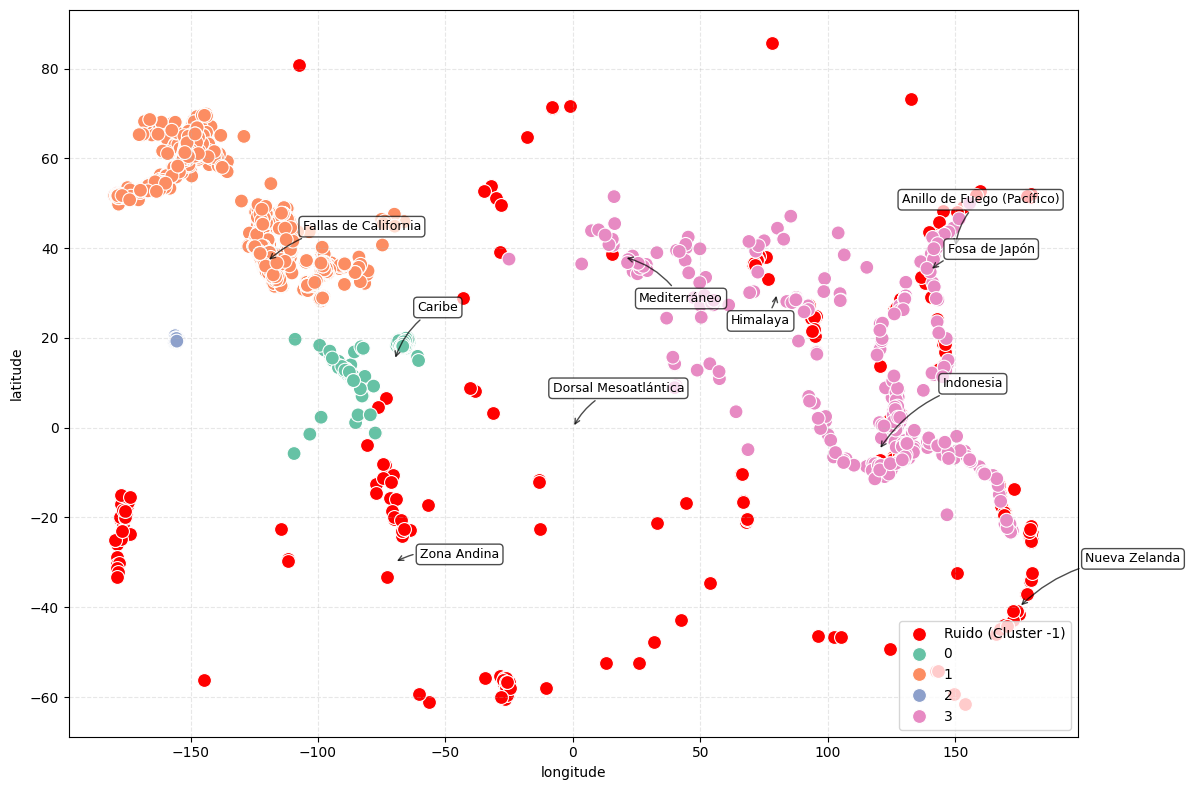

In [ ]:
####   4. Análisis de Resultados con los cluser mas representativos::

import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de regiones
regiones = {
    "Anillo de Fuego (Pacífico)": (150, 40),
    "Fosa de Japón": (140, 35),
    "Zona Andina": (-70, -30),
    "Dorsal Mesoatlántica": (0, 0),
    "Himalaya": (80, 30),
    "Indonesia": (120, -5),
    "Fallas de California": (-120, 37),
    "Nueva Zelanda": (175, -40),
    "Caribe": (-70, 15),
    "Mediterráneo": (20, 38)
}




plt.figure(figsize=(12, 8))

scatter_ruido = sns.scatterplot(data=ruido, x='longitude', y='latitude',  color='red', label='Ruido (Cluster -1)', s=100)
sns.scatterplot(data=no_ruido, x='longitude', y='latitude', hue='cluster', palette='Set2', s=100)
scatter_ruido.grid(True)

# Añadir las etiquetas con flechas
for region, coords in regiones.items():
    plt.annotate(
        region,
        xy=coords,
        xytext=(coords[0] + np.random.randint(-30, 30),
                coords[1] + np.random.randint(-15, 15)),
        fontsize=9,
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="arc3,rad=0.2",
            color="black",
            alpha=0.7
        ),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )

# Añadir una cuadrícula para mejor referencia
plt.grid(linestyle='--', alpha=0.3)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0)) # Mueve la leyenda a la esquina inferior derecha
# Mejorar los márgenes
plt.tight_layout()

plt.show()






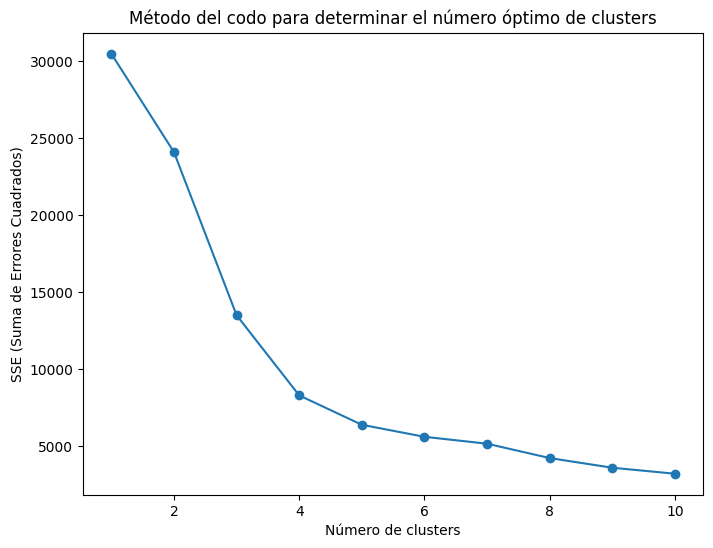

In [ ]:
#### Metodos del Codo
from sklearn.cluster import KMeans


# Método del codo para determinar el número óptimo de clusters
sse = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(df_normalizado)
    sse.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE (Suma de Errores Cuadrados)')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()
####  la tecnica del Codo indica que son 5 clusters....

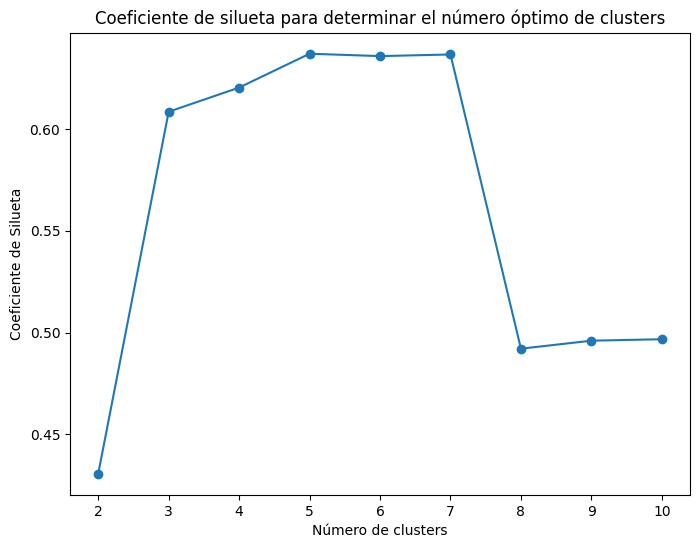

In [ ]:
### Silueta:
from sklearn.metrics import silhouette_score

sil_scores = []  # Coeficiente de silueta

for k in k_range[1:]:  # Comienza desde 2 porque silhouette_score necesita al menos 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42,n_init="auto")
    kmeans.fit(df_normalizado)
    cluster_labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_normalizado, cluster_labels))

# Gráfica del coeficiente de silueta
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], sil_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de silueta para determinar el número óptimo de clusters')
plt.show()

## Silueta indica 5,

######Compara con K-Means (ejemplo: KMeans(n_clusters=5)).
######Compara con K-Means (ejemplo: KMeans(n_clusters=5)).

In [ ]:
######Compara con K-Means (ejemplo: KMeans(n_clusters=5)).
######Compara con K-Means (ejemplo: KMeans(n_clusters=5)).

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Casoterremoto.csv")
X_K = data[["latitude", "longitude", "depth"]]
df_K =pd.DataFrame(X_K, columns=["latitude", "longitude", "depth"] )



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
model = KMeans(n_clusters=5, random_state=42)


In [ ]:
model.fit(df_normalizado[['latitude', 'longitude', 'depth']])
df_K['Cluster'] = model.predict(df_normalizado[['latitude', 'longitude', 'depth']])

<Axes: xlabel='Cluster'>

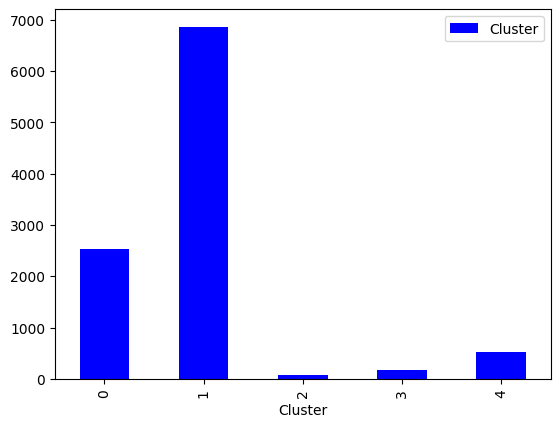

In [ ]:
df_K.groupby('Cluster')[['Cluster']].count().plot.bar(color = ['blue', 'red', 'yellow'] )

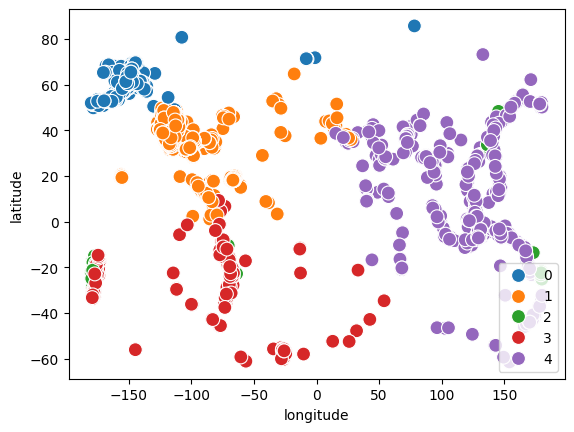

In [ ]:
sns.scatterplot(data=df_K,  x='longitude', y='latitude' , hue='Cluster', palette='tab10', s=100)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))

¿Cómo afecta el parámetro eps a la identificación de zonas sísmicas?
El Eps correscponde al radio entre los puntos, por lo que al ser una grafico de laitutd y longitud,  mientras mas  grande el radio mas puntocoordins
puede cubrir , aun mas cuando se trata de  coordenas gps

¿Por qué algunos terremotos se clasifican como ruido? Ejemplo: ¿Qué características tendría un terremoto "ruidoso"?
HAn caido  como ruido, por estar en La zonas (Polos ) gLatitud 70 y longitud -20
Han caido en ruido por la longitud  160 y latiud -40 representa el Pacifico Sur que colinda con  Nueva Zelanda
Otros vlaores de Ruido cerca de ala Fosa  Japon
 otros son ruidos porque se encuentran en los oceanos  y puede ser alguna anomalia propia del oceano .

In [ ]:
####   DBSCAN sobre K-Means, dbscan detemrina los valores

##DBSCAN tiene la capacidad de identificar y manejar el ruido en los datos, es decir, puntos que no pertenecen a ningún clúster.
##Esto es valioso en el análisis sísmico, donde los datos pueden contener anomalías o eventos aislados que no son patornes sísmicos

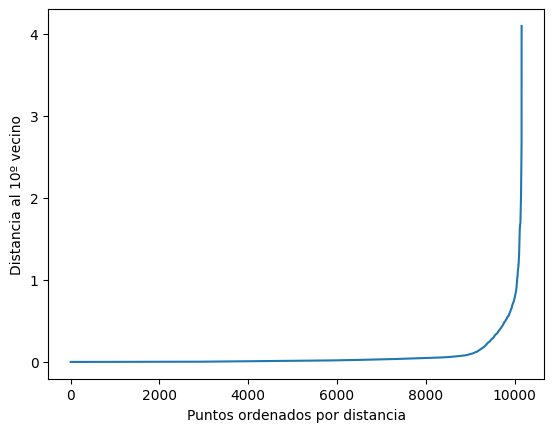

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df_normalizado)
distances, _ = neighbors_fit.kneighbors(df_normalizado)
distances = np.sort(distances[:, -1], axis=0)

plt.plot(distances)
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 10º vecino")
plt.show()